<a href="https://colab.research.google.com/github/Lupoyo/projectNew/blob/main/RSAClaims_Performance_pythonNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
claims_data = pd.read_excel('/content/drive/MyDrive/Claims Performance Analyst - Assessment v0.3.xlsx', sheet_name='Claims Data')
policies_data = pd.read_excel('/content/drive/MyDrive/Claims Performance Analyst - Assessment v0.3.xlsx', sheet_name='Policies')

In [4]:
merged_data = claims_data.merge(policies_data,
                                left_on=['Insurer', 'Incident_Month'],
                                right_on=['Insurer', 'Live_Policy_Date'],
                                how='inner')

In [5]:
median_cost = merged_data['Cost'].median()
merged_data['High_Cost'] = (merged_data['Cost'] > median_cost).astype(int)


In [6]:
columns_to_drop = ['Claim_Number', 'Incident_Date', 'Cost', 'Live_Policy_Date']
merged_data = merged_data.drop(columns=columns_to_drop)

In [7]:
# Encode categorical variables
label_encoders = {}
for col in ['Insurer', 'Main_Cause', 'Sub_Cause']:
    le = LabelEncoder()
    merged_data[col] = le.fit_transform(merged_data[col])
    label_encoders[col] = le

In [8]:
X = merged_data.drop(columns=['High_Cost'])
y = merged_data['High_Cost']


In [9]:
print("Columns in Claims Data:")
print(claims_data.columns)

Columns in Claims Data:
Index(['Claim_Number', 'Incident_Month', 'Incident_Date', 'Insurer',
       'Main_Cause', 'Sub_Cause', 'Cost'],
      dtype='object')


In [10]:
if 'Claim_Number' in claims_data.columns:
    # Remove duplicates based on the 'Claim_Number' column
    claims_data_cleaned = claims_data.drop_duplicates(subset=['Claim_Number'])
    print("Original Rows in Claims Data:", len(claims_data))
    print("Rows After Removing Duplicates:", len(claims_data_cleaned))
else:
    print("Error: Column 'Claim_Number' not found in Claims Data. Check the column name.")

Original Rows in Claims Data: 79539
Rows After Removing Duplicates: 79539


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [13]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

In [16]:
print("Logistic Regression Metrics")
print(classification_report(y_test, y_pred_logistic))
print(f"ROC AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])}")

print("\nGradient Boosting Metrics")
print(classification_report(y_test, y_pred_gb))
print(f"ROC AUC: {roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])}")


Logistic Regression Metrics
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      7903
           1       0.70      0.72      0.71      8005

    accuracy                           0.71     15908
   macro avg       0.71      0.71      0.71     15908
weighted avg       0.71      0.71      0.71     15908

ROC AUC: 0.6941827924041211

Gradient Boosting Metrics
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      7903
           1       0.75      0.71      0.73      8005

    accuracy                           0.73     15908
   macro avg       0.74      0.73      0.73     15908
weighted avg       0.74      0.73      0.73     15908

ROC AUC: 0.7869504721639322


In [17]:
import seaborn as sns

In [18]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

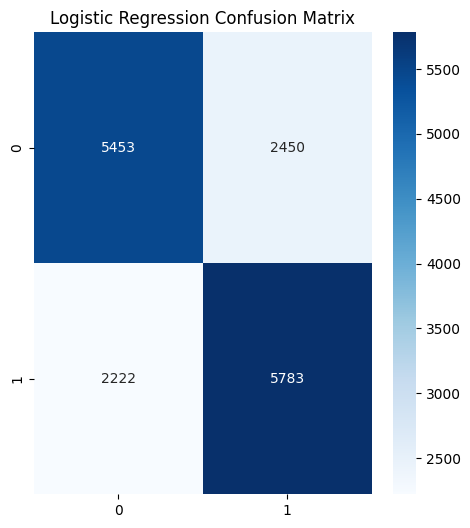

In [19]:
# Confusion Matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")


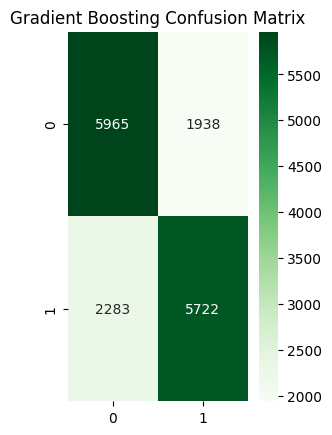

In [20]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Greens')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

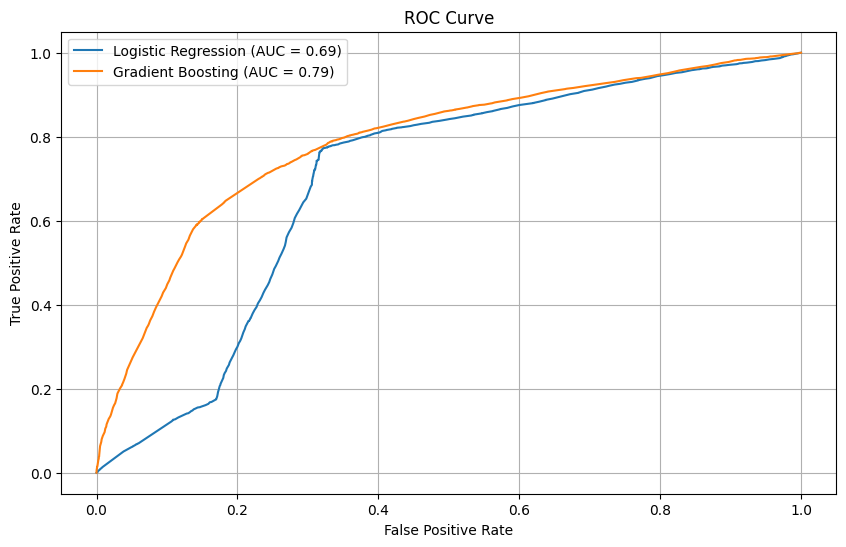

In [23]:
# ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

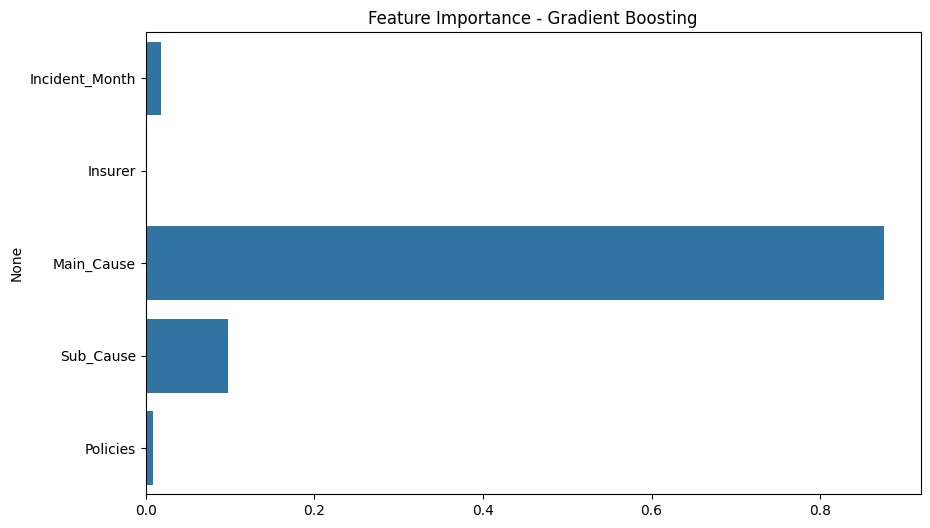

In [24]:
# Feature Importance for Gradient Boosting
plt.figure(figsize=(10, 6))
importance = gb_model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance - Gradient Boosting")
plt.show()

In [28]:
# Predictions
predictions = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression Prediction': y_pred_logistic,
    'Gradient Boosting Prediction': y_pred_gb
})
print(predictions.head())



       Actual  Logistic Regression Prediction  Gradient Boosting Prediction
19258       1                               1                             1
57861       0                               1                             0
3289        0                               0                             0
17516       0                               0                             0
37281       1                               1                             1


In [32]:
from sklearn.metrics import precision_recall_curve


In [34]:
import numpy as np

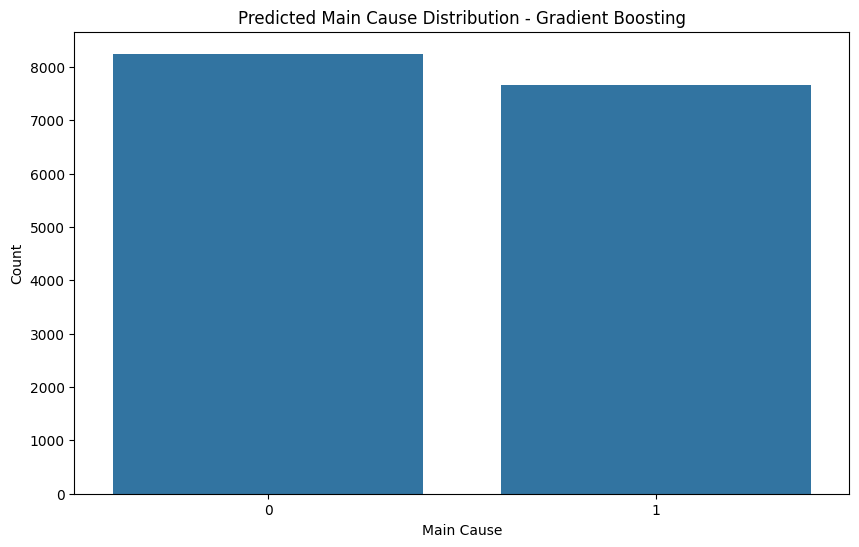

In [35]:
# Chart for Predicted Main Cause Distribution (Gradient Boosting)
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_gb, order=np.unique(y_pred_gb))
plt.title('Predicted Main Cause Distribution - Gradient Boosting')
plt.xlabel('Main Cause')
plt.ylabel('Count')
plt.show()

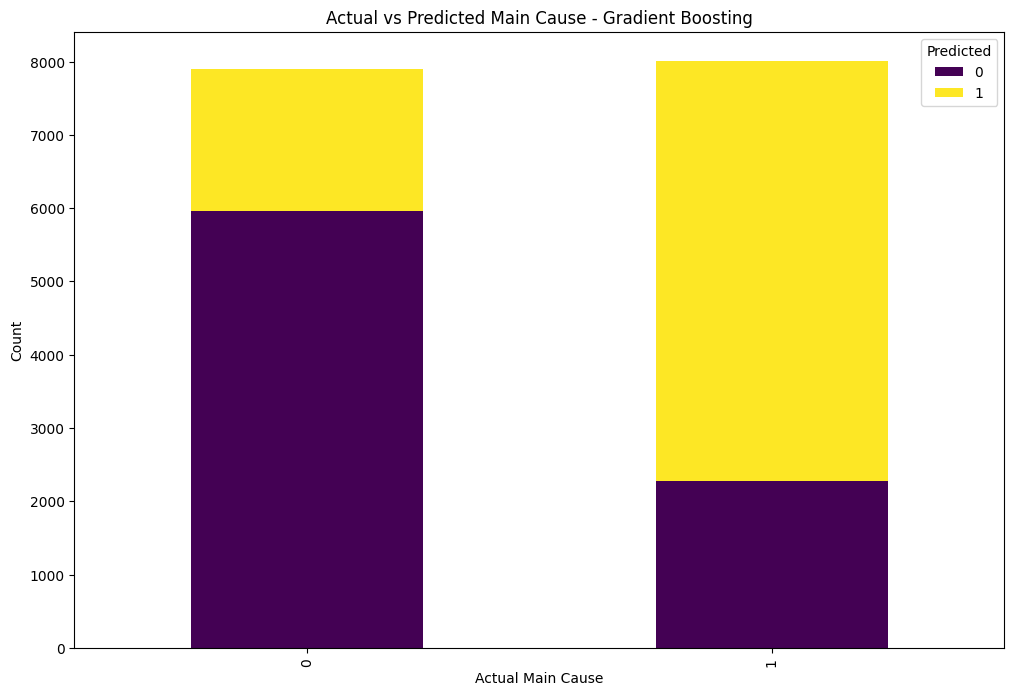

In [36]:
# Chart for Actual vs Predicted Main Cause (Gradient Boosting)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
comparison_summary = comparison_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
comparison_summary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Actual vs Predicted Main Cause - Gradient Boosting')
plt.xlabel('Actual Main Cause')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.show()
